In [132]:
#imports

import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#multiple linear regression
from sklearn import linear_model

#for penalized linear model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#default fig size
plt.rcParams['figure.figsize'] = [10, 5]






In [27]:
#load data
test_data = pd.read_csv("data/test.csv")
train_data = pd.read_csv("data/train.csv")


([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

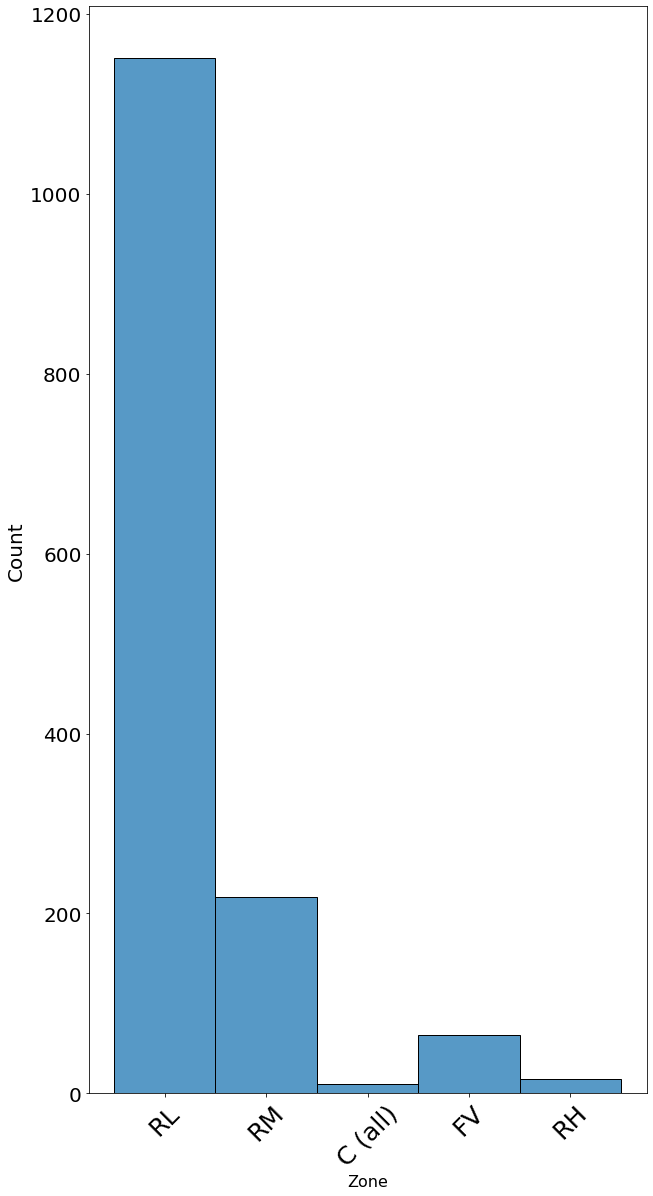

In [28]:
plt.rcParams['figure.figsize'] = [10, 20]
sns.histplot(data=train_data, x='MSZoning')
plt.ylabel('Count',fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Zone', fontsize=16)
plt.xticks(rotation=45, fontsize=25)

In [29]:
#check for na values
train_data_isna = train_data.isna().sum()/len(train_data)*100
train_data_isna[train_data_isna>0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

Based on this, I will not use PoolQC, MiscFeature, Alley,Fence,FireplaceQua,LotFrontage.

In [30]:
train_corr = train_data.corr()
train_corr[abs(train_corr)>0.7]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSSubClass,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790982
OverallCond,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
train_corr[abs(train_corr)>0.7].to_csv("corr.csv")

Found the following correlations greater that +/- 0.7:
<br>GarageYrBlt (drop) v YearBlt = 0.825
<br>SalePrice v OverallQual=0.790982
<br>SalePrice v GrLivArea = 0.709
<br>1stFlrSF vs TotalBsmtSF (drop) = 0.819529975005035
<br>TotRmsAbvGrd vs GrLivArea (drop)
<br>GarageArea (drop)vs GarageCars

<p>Makes sense that year built and garage year built are correlated. Therefore, I will not use garage year built.</p>


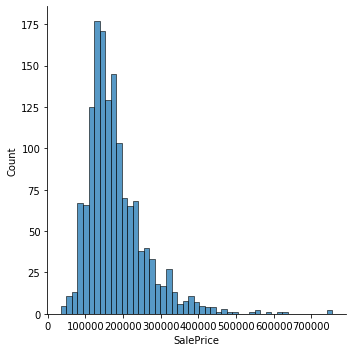

In [32]:
#Plot the histogram of SalePrice
sns.displot(train_data, x ='SalePrice')

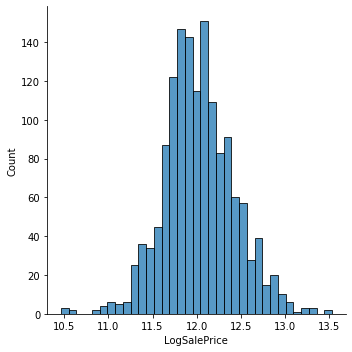

In [33]:
train_data['LogSalePrice']=[math.log(x)for x in train_data['SalePrice']]
sns.displot(train_data, x ='LogSalePrice')

#natural log transformation

In [34]:
train_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageYrBlt','TotalBsmtSF','GrLivArea','GarageArea'],inplace=True,axis=1)



In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-

In [36]:
train_dummified = pd.get_dummies(train_data, drop_first=True)
train_dummified

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,0,1,0,0,0,1,0


In [37]:
for col in train_data:
    print(col)
    print(train_data[col].unique())

Id
[   1    2    3 ... 1458 1459 1460]
MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
LotArea
[ 8450  9600 11250 ... 17217 13175  9717]
Street
['Pave' 'Grvl']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual
[ 7  6  8  5  9  4 10  3  1  2]

Based on this, the columns I would like to one-hot encode are listed in nominal_cols variable.

In [38]:
nominal_cols = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType', 'HouseStyle','RoofStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']
train_data_nominal_dummies = pd.get_dummies(train_data[nominal_cols],drop_first=True)
train_data.drop(nominal_cols,inplace=True,axis=1)
train_data = train_data.join(train_data_nominal_dummies)
train_data.dropna(inplace=True)

In [39]:
train_data_x = train_data.drop(['LogSalePrice','SalePrice'], axis=1)
train_data_y = train_data['LogSalePrice']
X_train, X_test, y_train, y_test = train_test_split(train_data_x, train_data_y, test_size=0.2, random_state = 42)

# OLS Fitting

Kaggle provides train and test data. However, their test data doesn't have sale price. So I will be doing a train/test split on just the train data.

In [40]:
linear_model
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

#Predictions
train_predict = ols.predict(X_train)
test_predict = ols.predict(X_test)

#residuals
train_res = train_predict - y_train
test_res = test_predict - y_test


In [41]:
ols_train_score = ols.score(X_train, y_train)
ols_test_score = ols.score(X_test, y_test)

print("train score:",ols_train_score)
print("train RSS:",np.sum(train_res)**2)
print("test score:",ols_test_score)
print("test RSS:",np.sum(test_res)**2)


train score: 0.9433329265408851
train RSS: 3.2110109830478153e-25
test score: 0.7408354898911464
test RSS: 0.3703070448291789


train std: 0.09458971788465491
train mean: 4.880773744777605e-16


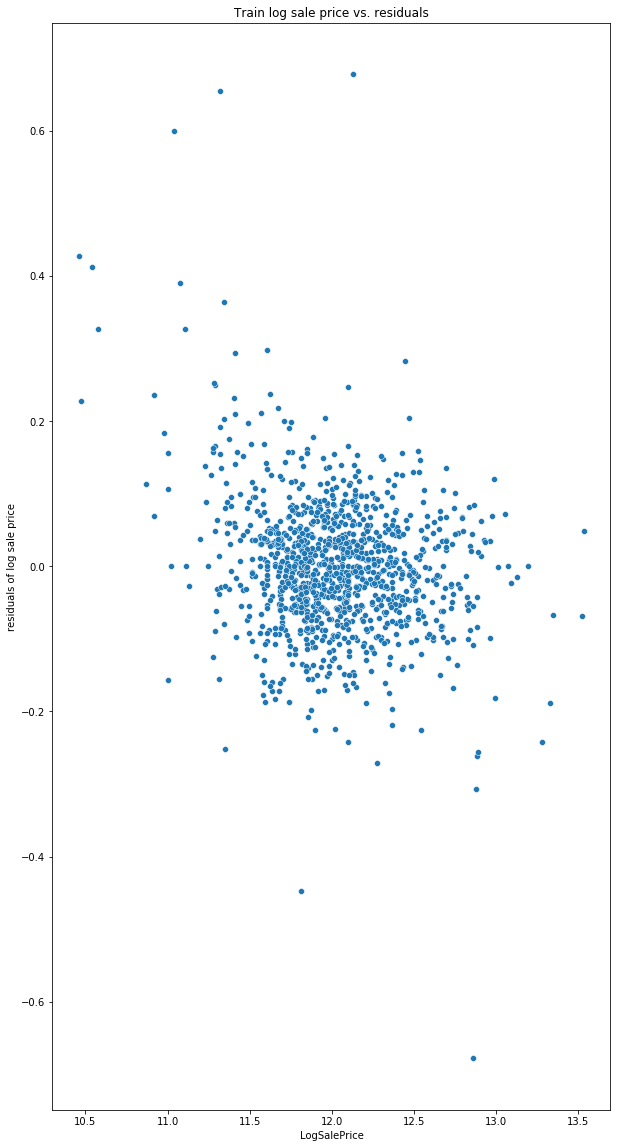

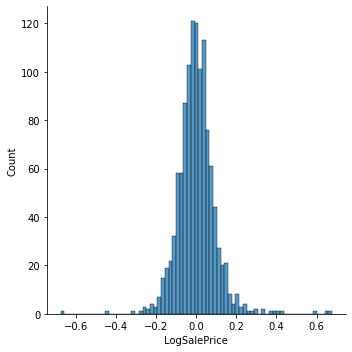

In [42]:
plt.ylabel("residuals of log sale price")
plt.title("Train log sale price vs. residuals")
sns.scatterplot(x=y_train, y = train_res)
sns.displot(train_res)
print("train std:",train_res.std())
print("train mean:",train_res.mean())


test std: 0.20764940096983425
test mean: -0.0020911635394674855


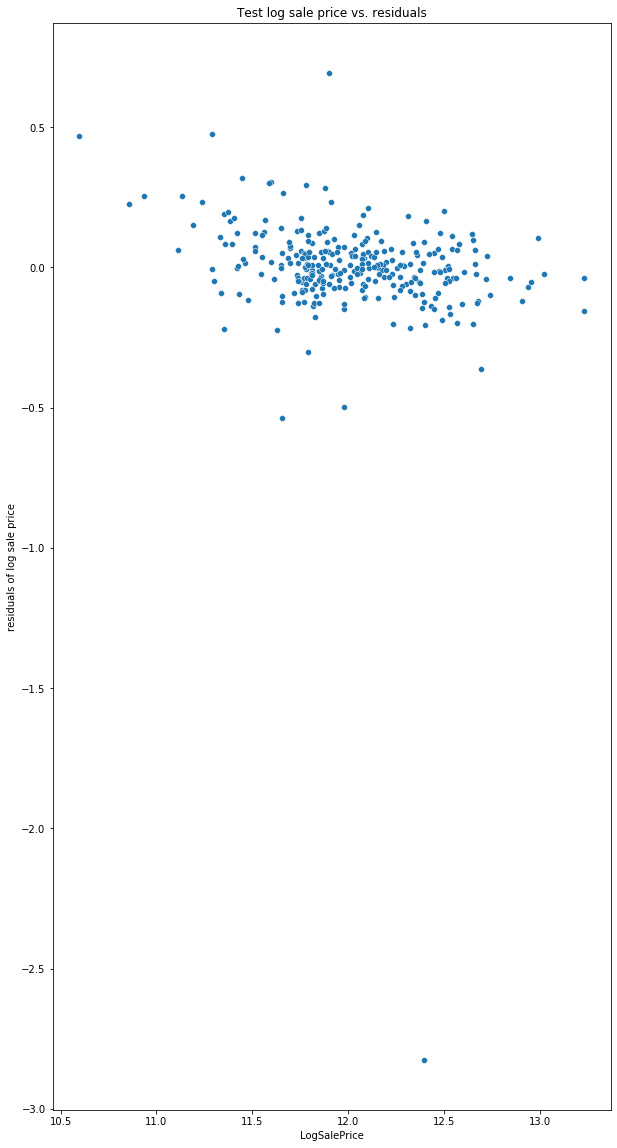

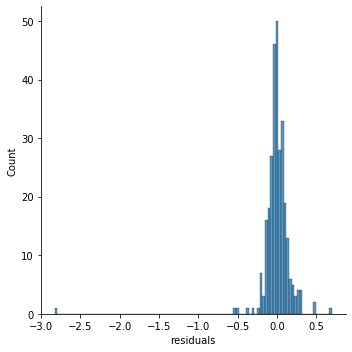

In [43]:
#test case stats
plt.ylabel("residuals of log sale price")
plt.title("Test log sale price vs. residuals")
sns.scatterplot(x=y_test, y = test_res)
g=sns.displot(test_res)
g.set_axis_labels("residuals")
print("test std:",test_res.std())
print("test mean:",test_res.mean())


In [44]:
test_res[abs(test_res)>1]

271   -2.824558
Name: LogSalePrice, dtype: float64

Train score is significantly higher than test score. The error is the test is driven by a few outliers. These are all signs of over-fitting.

In [45]:
len(ols.coef_)

233

In [46]:
len(X_train.columns)

233

In [47]:
ols.intercept_

6.522893649898872

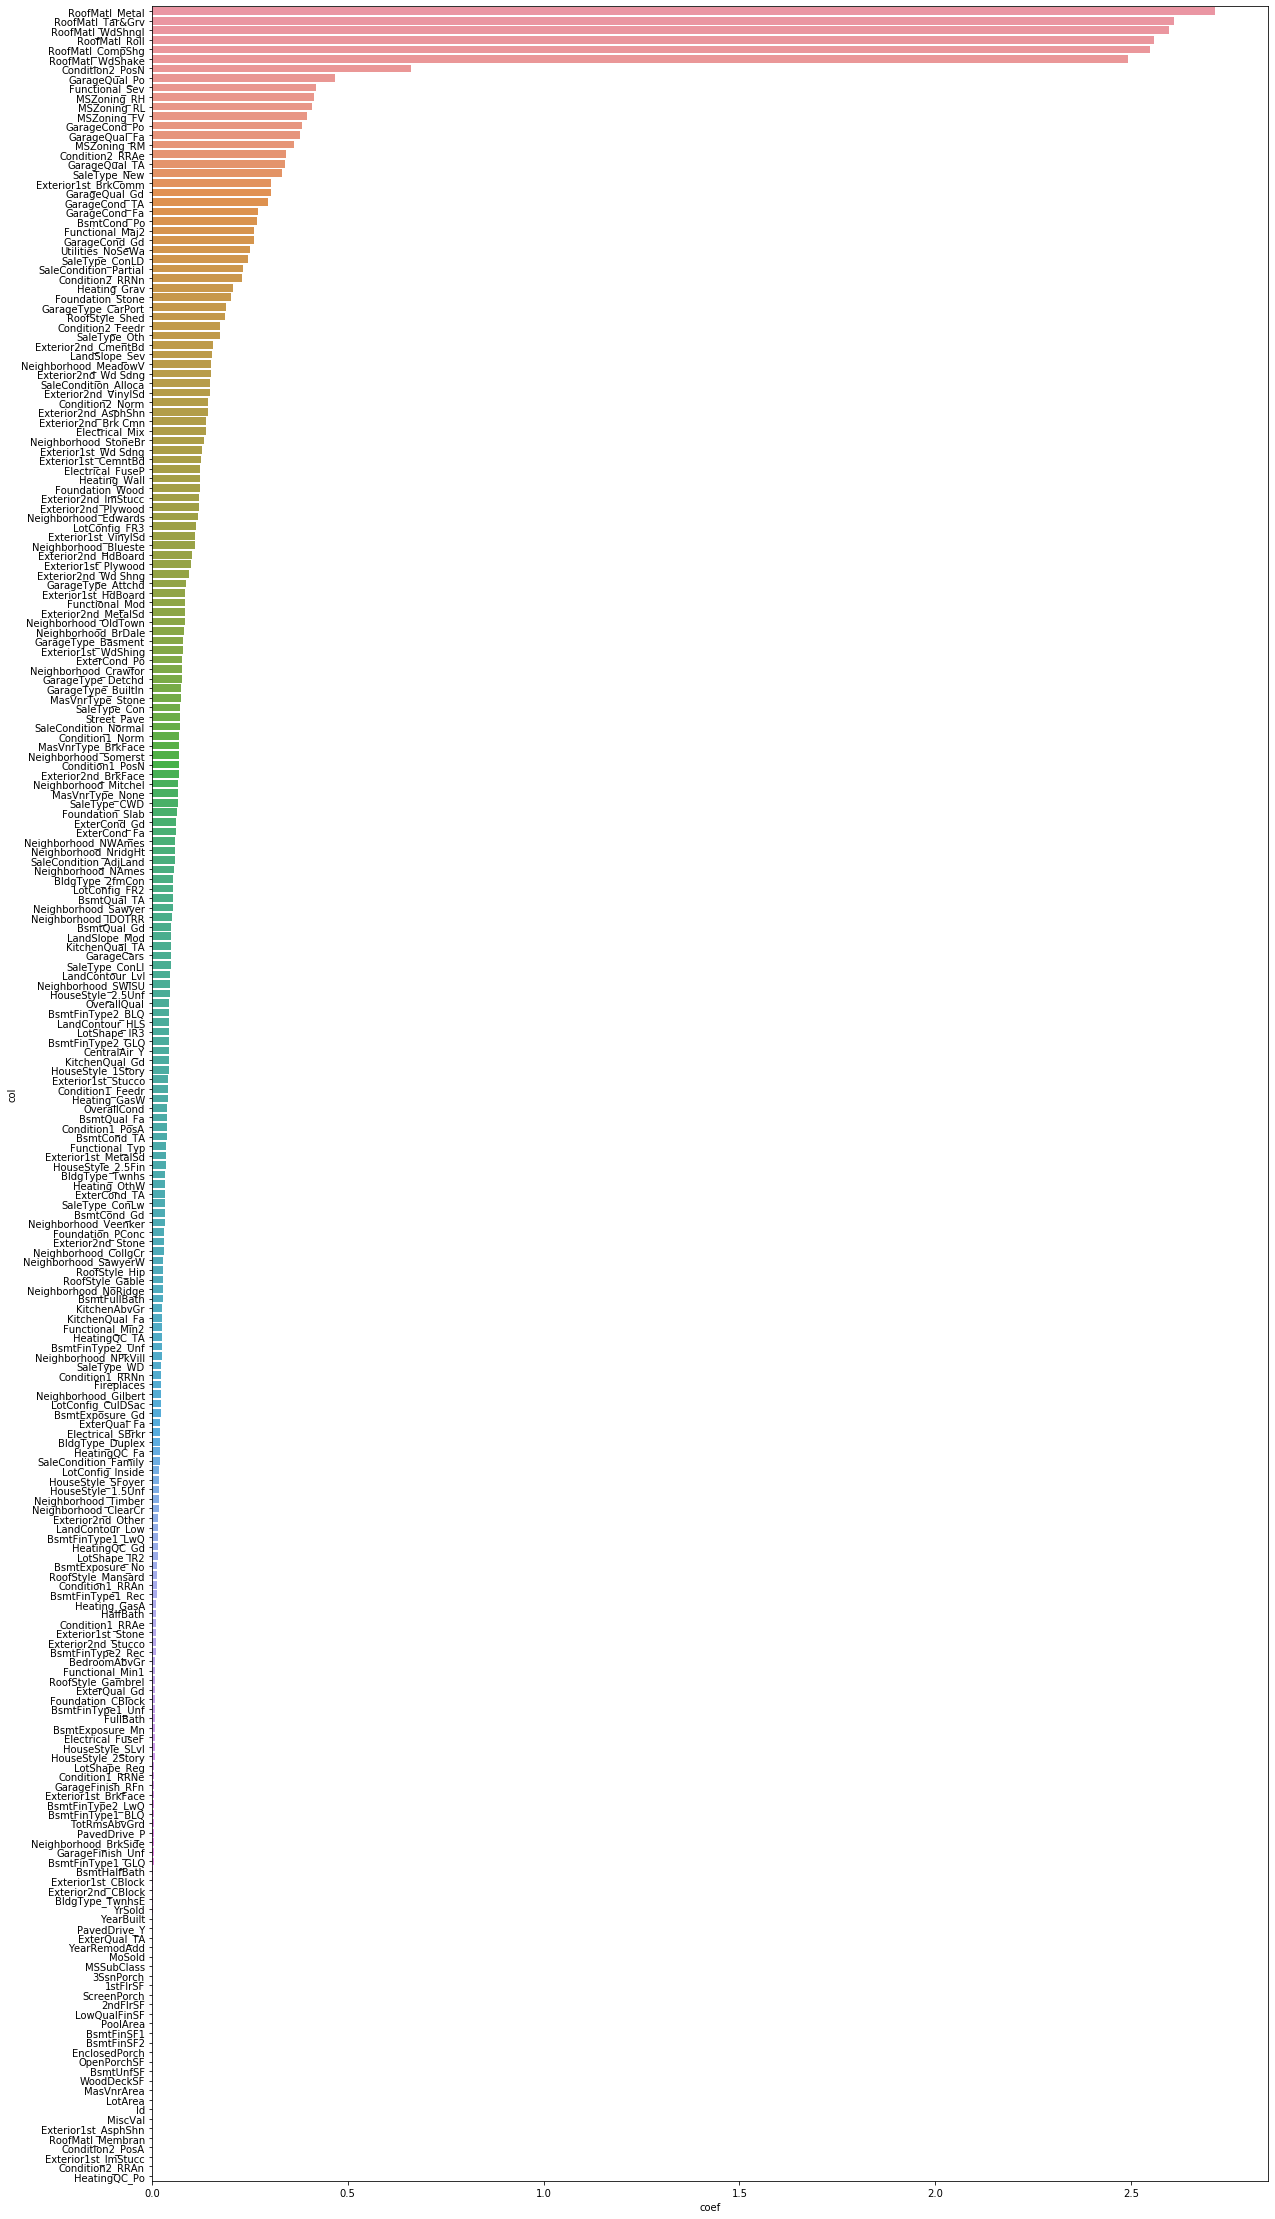

In [48]:
ols_coefs = pd.DataFrame({'col':X_train.columns,'coef':abs(ols.coef_)}).sort_values(by='coef',ascending=False)
ols_coefs
plt.rcParams['figure.figsize'] = [20, 40]
sns.barplot(x=ols_coefs['coef'],y=ols_coefs['col'])

Dominant features are roof material, MS Zoning, garage qual.

# Penalized Linear Regression

In [50]:
#Use elastic net, which is a mix of ridge and lasso

#just guess alpha and l1_ratio
enet = ElasticNet(alpha=0.1, l1_ratio=0.5, normalize=False)
enet.fit(X_train, y_train)

#Predictions
train_predict = enet.predict(X_train)
test_predict = enet.predict(X_test)

#residuals
train_res = train_predict - y_train
test_res = test_predict - y_test

#score is Rsquared
print("train score:",enet.score(X_train, y_train))
print("train RSS:",np.sum(train_res)**2)
print("test score:",enet.score(X_test, y_test))
print("test RSS:",np.sum(test_res)**2)



train score: 0.8060765722229479
train RSS: 1.1549712513340834e-24
test score: 0.8479577403188765
test RSS: 0.5217066404253964


Now try to interate through the different alpha and rho.

In [51]:
N_alpha = 100
N_rho   = 10
params_df = pd.DataFrame(columns=['alpha','rho','score'])

alphaRange = np.logspace(-10, 2, N_alpha)
rhoRange   = np.linspace(0.1,1, N_rho) # we avoid very small rho by starting at 0.1
scores     = np.zeros((N_rho, N_alpha))
for alphaIdx, alpha in enumerate(alphaRange):
    for rhoIdx, rho in enumerate(rhoRange):
            enet.set_params(alpha=alpha, l1_ratio=rho, normalize=False)
            enet.fit(X_train, y_train)
            score = enet.score(X_test,y_test) 
            df2 = pd.DataFrame(data=[[alpha,rho,score]] ,columns=['alpha','rho','score'])
            params_df = params_df.append(df2)

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.189592915580819, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.189592886097971, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.1895928566117675, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objectiv

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.189596225409126, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.189596157282545, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.18959608913814, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective 

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.1896038714367165, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.189603713962681, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.189603556393631, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objectiv

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.189621534191612, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.189621169911806, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.189620805124792, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.18966233446103, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.189661490295033, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.189660643422151, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective 

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.189756572516233, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.189754608408741, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.189752629857353, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.1898479633142784, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.18997419085859, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.189969579790055, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.190179542386835, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.190476481038445, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.190465444392276, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.190919658747527, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.191658595337681, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.191607636220649, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.1925143040081165, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.194301259838597, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.194230145182643, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objectiv

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.19518296594117, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.200419016670186, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.200232351770088, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective 

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.203733722030192, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.214362319334445, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.2137578374145335, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objectiv

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.201895990439606, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.245340170239833, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.245706605962299, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.050250720828005, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.313138601103459, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.307545279045097, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8418859242644414, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.439745193621538, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.405429417380182, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objectiv

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.724291799369612, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.320841584615844, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.719829795124852, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

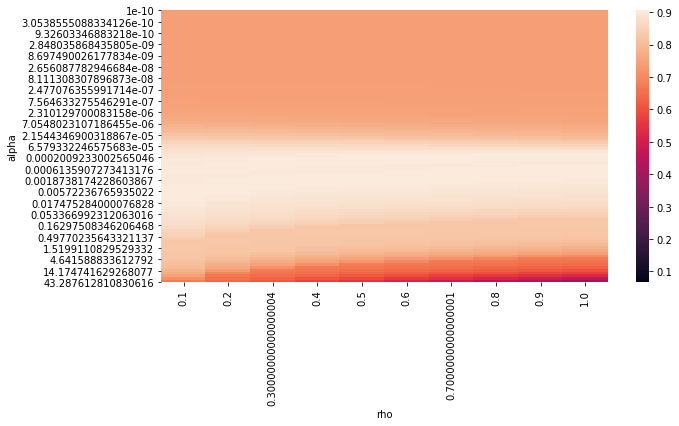

In [52]:
heatmap_data = params_df.pivot(index='alpha',columns='rho',values='score')

plt.rcParams['figure.figsize'] = [10, 5]
sns.heatmap(heatmap_data)

#redo with test set as the true metric.

Penalized Linear Regression does not have any benefit. The preferred alpha is basically 0. This means that the original model was not really over-fitting. Its just the best the model can do given the noise in data.

In [53]:
params_df.loc[params_df['score']==max(params_df['score'])]
ols_constrained_best_score = max(params_df['score'])
best_alpha = params_df.loc[params_df['score']==max(params_df['score'])]['alpha'].iloc[0]
best_rho = params_df.loc[params_df['score']==max(params_df['score'])]['rho'].iloc[0]




refit linear model score 0.905709704413102


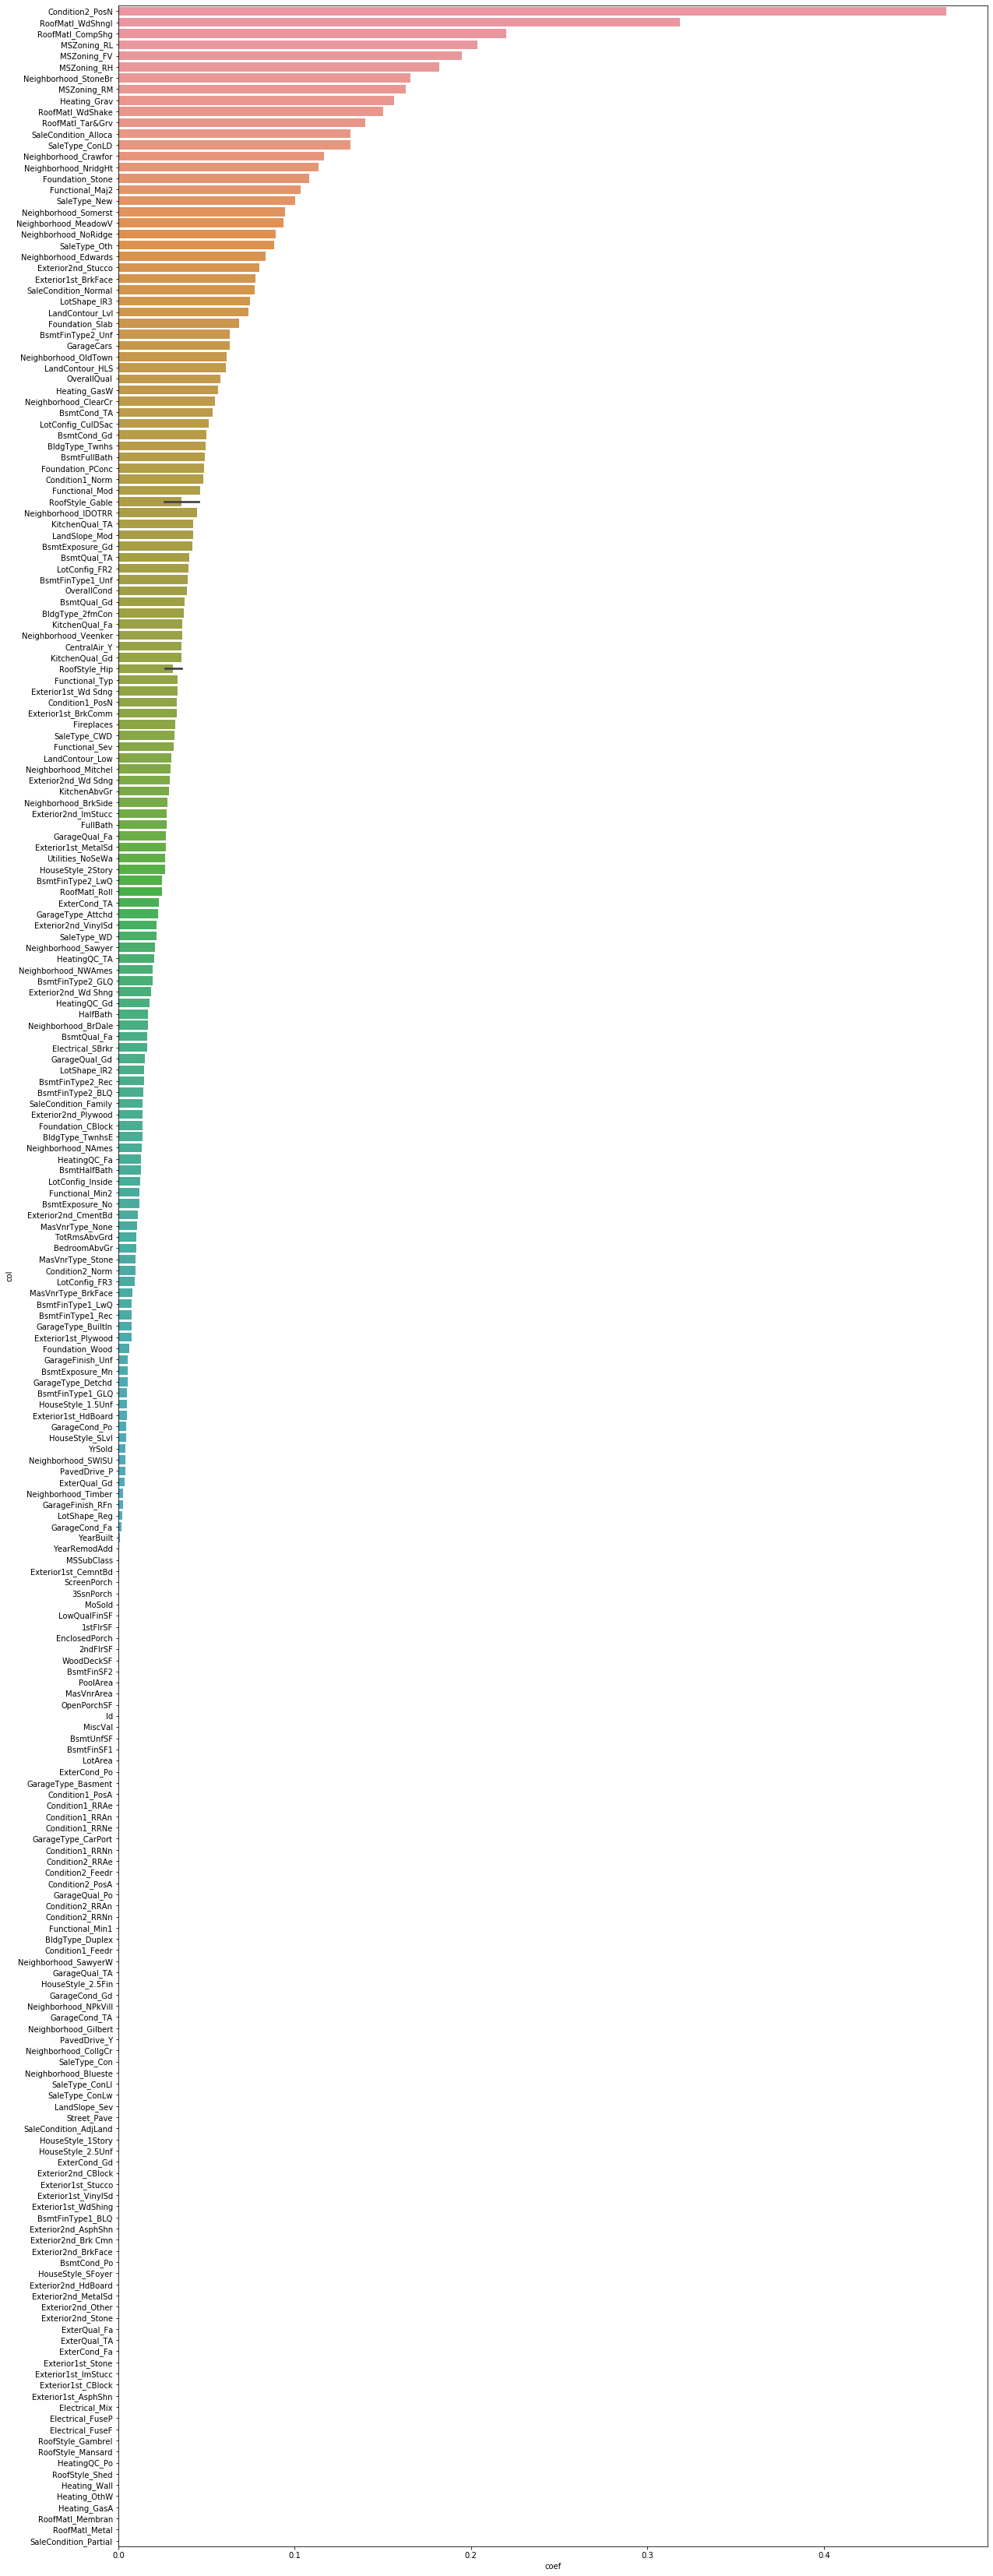

In [54]:
#refit

enet_opt = ElasticNet(alpha=best_alpha, l1_ratio=best_rho, normalize=False)
enet_opt.fit(X_train, y_train)

enet_refit_score = enet_opt.score(X_test, y_test)
print("refit linear model score",enet_refit_score)

enet_opt_coefs = pd.DataFrame({'col':X_train.columns,'coef':abs(enet_opt.coef_),'coef_raw':enet_opt.coef_}).sort_values(by='coef',ascending=False)
plt.rcParams['figure.figsize'] = [20, 60]
sns.barplot(x=enet_opt_coefs['coef'],y=enet_opt_coefs['col'])

In [55]:
enet_opt_coefs.loc[enet_opt_coefs['col'].isin(['BedroomAbvGr','YrSold','MSZoning_RL','OverallQual','GrLivArea'])]

#MSZoning_RL is residential Low Density


,col,coef,coef_raw
34,MSZoning_RL,0.203506,0.203506
3,OverallQual,0.058090,0.058090
18,BedroomAbvGr,0.010243,0.010243
31,YrSold,0.004099,-0.004099


# Random Forest

documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [56]:
#fit the tree and score
tree_model = RandomForestRegressor(oob_score = True, n_estimators=100)
tree_model.get_params()


{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [57]:
tree_model.fit(X_train,y_train)
print("train score:",tree_model.score(X_train, y_train))
print("train oob score:",tree_model.oob_score_)
print("test score:", tree_model.score(X_test,y_test))


train score: 0.9792325514121688
train oob score: 0.8482873553093595
test score: 0.8634566508165411


In [58]:
train_predict = tree_model.predict(X_train)
test_predict = tree_model.predict(X_test)

train_res = train_predict - y_train
test_res = test_predict - y_test

train std: 0.05726052531360569
train mean: -0.00047224336815434204


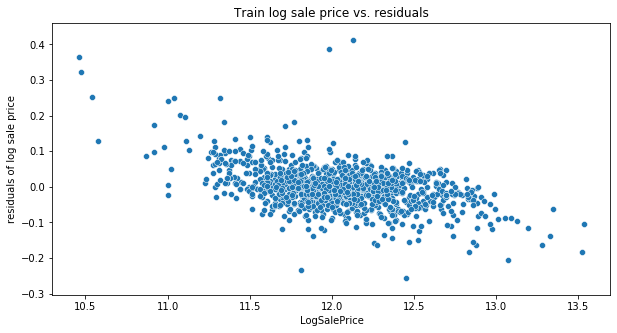

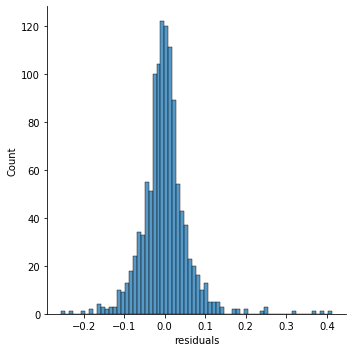

In [59]:
plt.rcParams['figure.figsize'] = [10, 5]

plt.ylabel("residuals of log sale price")
plt.title("Train log sale price vs. residuals")
sns.scatterplot(x=y_train, y = train_res)

g=sns.displot(train_res)
g.set_axis_labels("residuals")
print("train std:",train_res.std())
print("train mean:",train_res.mean())


train std: 0.15032455442654213
train mean: 0.011031930791663045


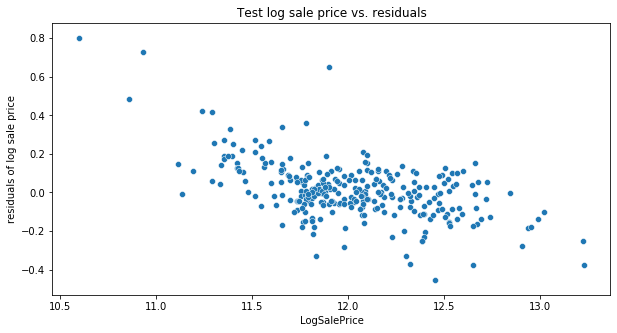

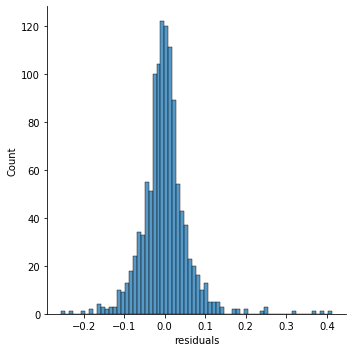

In [60]:
plt.ylabel("residuals of log sale price")
plt.title("Test log sale price vs. residuals")
sns.scatterplot(x=y_test, y = test_res)
g = sns.displot(train_res)
g.set_axis_labels("residuals")
print("train std:",test_res.std())
print("train mean:",test_res.mean())

Try to fine-tune the Random Forest model

In [61]:
tree_params = [{
    
    "n_estimators":range(85,125),
    'min_samples_split': range(2,5),
}]
grid_search_tree = GridSearchCV(tree_model, tree_params, cv=5, n_jobs=-1)
%time grid_search_tree.fit(X_train, y_train)

CPU times: user 4.39 s, sys: 258 ms, total: 4.65 s
Wall time: 3min 16s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=True, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'min_samples_split': range(2, 5),
  

In [62]:
print("best params:",grid_search_tree.best_params_)
print("best score:",grid_search_tree.best_score_)
tree_best_score = grid_search_tree.best_score_;

best params: {'min_samples_split': 3, 'n_estimators': 118}
best score: 0.8514500077512104


In [63]:
tree_model_opt = RandomForestRegressor(oob_score = True, min_samples_split = 2, n_estimators=118)
tree_model_opt.fit(X_train,y_train)
tree_model_opt_train_score = tree_model_opt.score(X_train,y_train)
tree_model_opt_test_score = tree_model_opt.score(X_test,y_test)

print("refit train score", tree_model_opt_train_score)
print("refit test score", tree_model_opt_test_score)

refit train score 0.9794317022968655
refit test score 0.8656294937696183


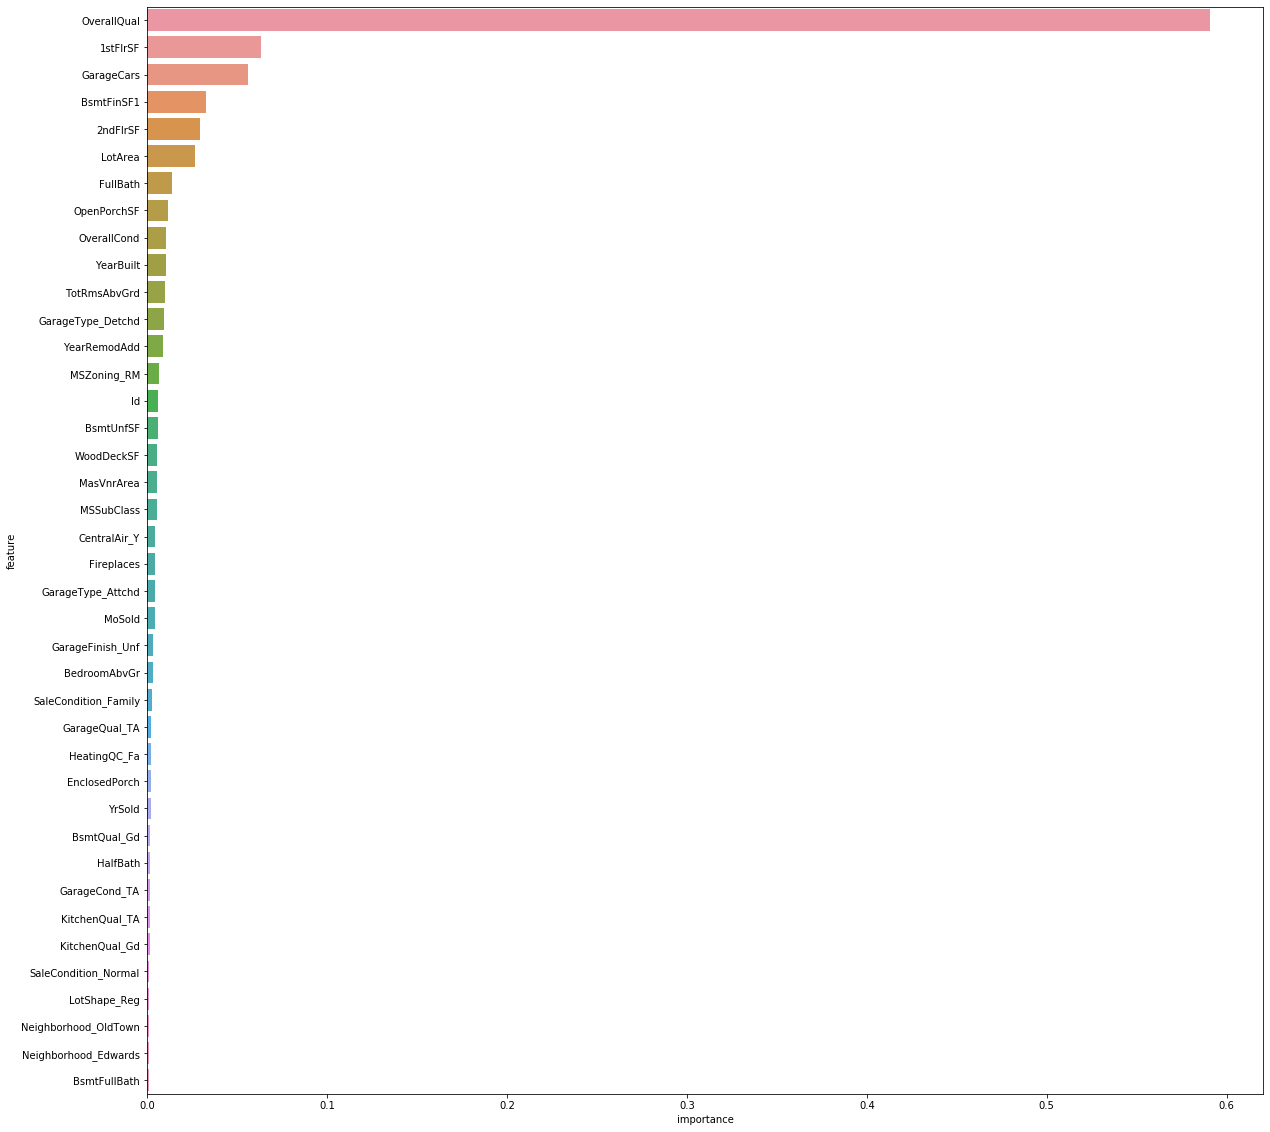

In [76]:
tree_model_params = pd.DataFrame({'feature':X_train.columns,'importance':tree_model.feature_importances_}).sort_values(by='importance',ascending=False)
tree_model_params.to_csv("tree_model_params.csv")
plt.rcParams['figure.figsize'] = [20, 20]
filter=40
sns.barplot(x=tree_model_params['importance'][:filter],y=tree_model_params['feature'][:filter])



In [65]:
#score summaries

print('linear train score',ols_train_score)
print('linear test score',ols_test_score)
print('constrained linear best',max(params_df['score']))
print("refit linear model score",enet_refit_score)
print('tree grid search best score',tree_best_score)
print("tree refit train score", tree_model_opt_train_score)
print("tree refit test score", tree_model_opt_test_score)

linear train score 0.9433329265408851
linear test score 0.7408354898911464
constrained linear best 0.905709704413102
refit linear model score 0.905709704413102
tree grid search best score 0.8514500077512104
tree refit train score 0.9794317022968655
tree refit test score 0.8656294937696183


# Skewing Parameters

Take sample rows and skew key parameters to see how price can change.

Best score is penalized linear but the params coefs and pareto keep changing based on sampling.So I will use Random Forest.

## Skewing OverallQual

In [66]:

#get the raw data again because need neighborhood not 1-hot encoded
train_data_raw = pd.read_csv("data/train.csv")
OverallQual_skew_df = pd.DataFrame()

#make the base case
OverallQual_skew_df['Id']=X_train['Id']
OverallQual_skew_df['bedroom']=X_train['BedroomAbvGr']
OverallQual_skew_df['Case']="OverallQual+0 (base)"
OverallQual_skew_df['OverallQual']=X_train['OverallQual']
OverallQual_skew_df['LogSalePrice']=y_train
OverallQual_skew_df=pd.merge(OverallQual_skew_df,train_data_raw[['Id','Neighborhood']],how='inner', on='Id')

#Maximum overallqual is 10. So only choose rows with qual no greater than 7 to prevent going over.
UCL=7
OverallQual_skew_df=OverallQual_skew_df.loc[OverallQual_skew_df['OverallQual']<UCL]
append_df_base = OverallQual_skew_df.copy()

#OverallQual+1
append_df= append_df_base.copy()
X_train_skew = X_train.loc[X_train['OverallQual']<UCL].copy()
X_train_skew["OverallQual"]+=1


append_df['Case']='OverallQual+1'
append_df.drop('OverallQual',axis=1,inplace=True)
append_df.drop('LogSalePrice',axis=1,inplace=True)
append_df=pd.merge(append_df, X_train_skew[['Id','OverallQual']], on='Id')
predict_df = pd.DataFrame({"Id":X_train_skew['Id'], 'LogSalePrice':tree_model_opt.predict(X_train_skew)})
append_df=pd.merge(append_df, predict_df, on='Id')

OverallQual_skew_df = OverallQual_skew_df.append(append_df, sort=True).copy()

#OverallQual+2
append_df= append_df_base.copy()
X_train_skew = X_train.loc[X_train['OverallQual']<UCL].copy()
X_train_skew["OverallQual"]+=2


append_df['Case']='OverallQual+2'
append_df.drop('OverallQual',axis=1,inplace=True)
append_df.drop('LogSalePrice',axis=1,inplace=True)
append_df=pd.merge(append_df, X_train_skew[['Id','OverallQual']], on='Id')
predict_df = pd.DataFrame({"Id":X_train_skew['Id'], 'LogSalePrice':tree_model_opt.predict(X_train_skew)})
append_df=pd.merge(append_df, predict_df, on='Id')

OverallQual_skew_df = OverallQual_skew_df.append(append_df, sort=True).copy()


#OverallQual+3
append_df= append_df_base.copy()
X_train_skew = X_train.loc[X_train['OverallQual']<UCL].copy()
X_train_skew["OverallQual"]+=3

append_df['Case']='OverallQual+3'
append_df.drop('OverallQual',axis=1,inplace=True)
append_df.drop('LogSalePrice',axis=1,inplace=True)
append_df=pd.merge(append_df, X_train_skew[['Id','OverallQual']], on='Id')
predict_df = pd.DataFrame({"Id":X_train_skew['Id'], 'LogSalePrice':tree_model_opt.predict(X_train_skew)})
append_df=pd.merge(append_df, predict_df, on='Id')

OverallQual_skew_df = OverallQual_skew_df.append(append_df, sort=True).copy()


#OverallQual+4
append_df= append_df_base.copy()
X_train_skew = X_train.loc[X_train['OverallQual']<UCL].copy()
X_train_skew["OverallQual"]+=4

append_df['Case']='OverallQual+4'
append_df.drop('OverallQual',axis=1,inplace=True)
append_df.drop('LogSalePrice',axis=1,inplace=True)
append_df=pd.merge(append_df, X_train_skew[['Id','OverallQual']], on='Id')
predict_df = pd.DataFrame({"Id":X_train_skew['Id'], 'LogSalePrice':tree_model_opt.predict(X_train_skew)})
append_df=pd.merge(append_df, predict_df, on='Id')

OverallQual_skew_df = OverallQual_skew_df.append(append_df, sort=True).copy()

OverallQual_skew_df['SalePrice']=[math.exp(x) for x in OverallQual_skew_df['LogSalePrice']]



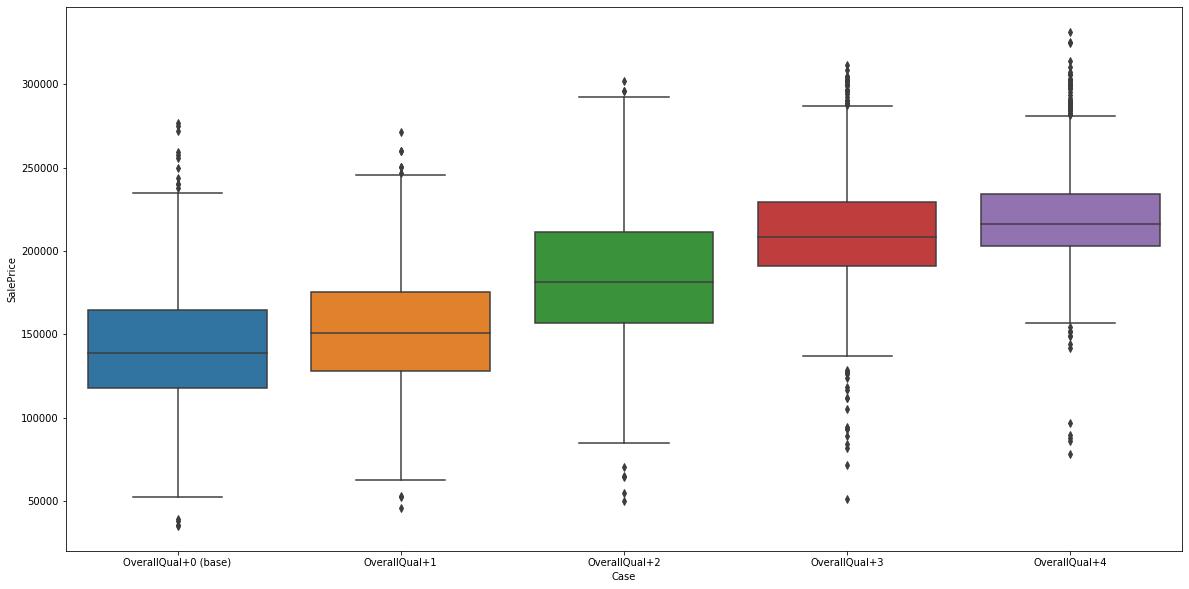

In [67]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.boxplot(data=OverallQual_skew_df,x='Case', y = 'SalePrice')

In [68]:
OverallQual_skew_df.groupby('Case').mean()[['LogSalePrice','SalePrice']]


,LogSalePrice,SalePrice
Case,,
OverallQual+0 (base),11.818892,141050.440329
OverallQual+1,11.907263,152621.552240
OverallQual+2,12.086445,182673.352862
OverallQual+3,12.231862,208984.864376
OverallQual+4,12.292149,220323.568035


Increasing qual by 1 can raise price by $8,856.

Increase by 1 more (+2 total), gain another $24,585.

Increase by 1 more (+3 total), gain another $22,724.

Increase by 1 more (+4 total), gain another $9,388.

In [69]:
OverallQual_skew_df.groupby('Case').std()[['LogSalePrice','SalePrice']]

,LogSalePrice,SalePrice
Case,,
OverallQual+0 (base),0.285555,37500.813017
OverallQual+1,0.243982,35587.468629
OverallQual+2,0.249029,42180.259046
OverallQual+3,0.198729,37700.808352
OverallQual+4,0.150217,31427.303482


In [70]:
pd.options.display.max_rows = 1000
OverallQual_skew_df.groupby(['Neighborhood','Case']).mean()[['LogSalePrice','SalePrice']]

LogSalePrice      SalePrice
Neighborhood Case                                             
Blueste      OverallQual+0 (base)     11.728037  124000.000000
             OverallQual+1            11.973278  158463.309886
             OverallQual+2            12.090351  178144.604870
             OverallQual+3            12.181657  195176.007768
             OverallQual+4            12.183530  195541.895480
BrDale       OverallQual+0 (base)     11.557736  105384.615385
             OverallQual+1            11.835405  138715.749412
             OverallQual+2            12.031790  168660.467223
             OverallQual+3            12.152561  189789.746700
             OverallQual+4            12.181979  195265.595936
BrkSide      OverallQual+0 (base)     11.689289  125931.097561
             OverallQual+1            11.731663  128613.432151
             OverallQual+2            11.894205  152512.040785
             OverallQual+3            12.073609  180666.129824
             OverallQual+4            12.165961  195582.749628
ClearCr      OverallQual+0 (base)     12.154852  194154.315789
             OverallQual+1            12.166299  195547.118786
             OverallQual+2            12.280836  218307.444219
             OverallQual+3            12.393873  243660.040510
             OverallQual+4            12.427868  251116.119057
CollgCr      OverallQual+0 (base)     11.919374  152765.627907
             OverallQual+1            11.982181  162395.252692
             OverallQual+2            12.127619  187205.958047
             OverallQual+3            12.256137  211363.688492
             OverallQual+4            12.294000  219015.970151
Crawfor      OverallQual+0 (base)     12.075461  180938.565217
             OverallQual+1            12.074053  180028.717364
             OverallQual+2            12.267862  217963.324896
             OverallQual+3            12.367583  238604.701455
             OverallQual+4            12.398993  245422.876540
Edwards      OverallQual+0 (base)     11.679704  123070.933333
             OverallQual+1            11.794326  136082.500898
             OverallQual+2            11.990206  165950.448555
             OverallQual+3            12.154088  193568.413872
             OverallQual+4            12.247223  210235.761376
Gilbert      OverallQual+0 (base)     12.089476  178769.258065
             OverallQual+1            12.134832  187165.068024
             OverallQual+2            12.264817  212814.758739
             OverallQual+3            12.328516  226516.703321
             OverallQual+4            12.338225  228586.162784
IDOTRR       OverallQual+0 (base)     11.446022   99345.964286
             OverallQual+1            11.633644  115793.242479
             OverallQual+2            11.794159  137390.107520
             OverallQual+3            12.004605  167399.881804
             OverallQual+4            12.127318  186988.389348
MeadowV      OverallQual+0 (base)     11.480033   99261.538462
             OverallQual+1            11.646928  118431.838974
             OverallQual+2            11.757038  132861.738734
             OverallQual+3            12.018803  167876.717479
             OverallQual+4            12.142134  188668.771045
Mitchel      OverallQual+0 (base)     11.889566  147850.000000
             OverallQual+1            11.982033  162070.598065
             OverallQual+2            12.175529  195991.516575
             OverallQual+3            12.302530  222014.294960
             OverallQual+4            12.343742  231087.047131
NAmes        OverallQual+0 (base)     11.840795  141004.215116
             OverallQual+1            11.921591  153135.948677
             OverallQual+2            12.123283  188266.917255
             OverallQual+3            12.275597  217222.400217
             OverallQual+4            12.334321  228996.959793
NPkVill      OverallQual+0 (base)     11.866477  142694.444444
             OverallQual+1            12.058289  172802.912429
   

# Skew GrLivArea

In [94]:
Floor1SF_skew_df = X_train[['Id','1stFlrSF']].sort_values(by='Id').copy()
Floor1SF_skew_df['Case']='1stFlrSF_x1'
Floor1SF_skew_df['LogSalePrice'] = y_train
Floor1SF_skew_df = pd.merge(Floor1SF_skew_df,train_data_raw[['Id','Neighborhood']],how='inner', on='Id')


append_df_base = Floor1SF_skew_df.copy()
X_train_skew_base = X_train.sort_values(by='Id').copy()

#increase area by 25%
X_train_skew = X_train_skew_base.copy()
X_train_skew['1stFlrSF']*=1.25
append_df = append_df_base.copy()

append_df.drop('1stFlrSF',axis=1,inplace=True)
append_df=pd.merge(append_df, X_train_skew[['Id','1stFlrSF']], on='Id')

append_df['Case'] = "1stFlrSF_x1.25"
prediction_df =pd.DataFrame({"Id":X_train_skew['Id'],"LogSalePrice":tree_model_opt.predict(X_train_skew) })
append_df.drop('LogSalePrice',axis=1,inplace=True)
append_df=pd.merge(append_df, prediction_df, on='Id')

Floor1SF_skew_df = Floor1SF_skew_df.append(append_df, sort=True).copy()
Floor1SF_skew_df['SalePrice']=[math.exp(x) for x in Floor1SF_skew_df['LogSalePrice']]

Floor1SF_skew_df

,1stFlrSF,Case,Id,LogSalePrice,Neighborhood,SalePrice
0,856.00,1stFlrSF_x1,1,12.247694,CollgCr,208500.000000
1,1262.00,1stFlrSF_x1,2,12.109011,Veenker,181500.000000
2,920.00,1stFlrSF_x1,3,12.317167,CollgCr,223500.000000
3,961.00,1stFlrSF_x1,4,11.849398,Crawfor,140000.000000
4,1145.00,1stFlrSF_x1,5,12.429216,NoRidge,250000.000000
...,...,...,...,...,...,...
1156,1425.00,1stFlrSF_x1.25,1454,11.771612,Mitchel,129522.721821
1157,1526.25,1stFlrSF_x1.25,1455,12.250864,Somerst,209161.905288
1158,2591.25,1stFlrSF_x1.25,1457,12.201002,NWAmes,198988.447444
1159,1485.00,1stFlrSF_x1.25,1458,12.464610,Crawfor,259006.926222


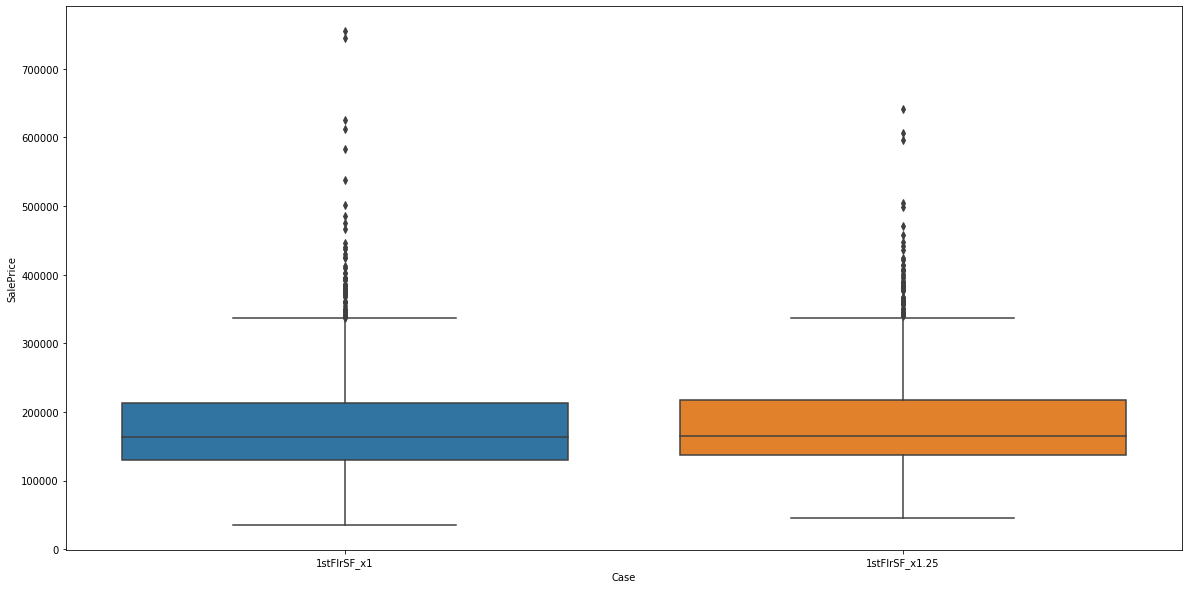

In [96]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.boxplot(data=Floor1SF_skew_df,x='Case', y = 'SalePrice')

In [97]:
base_case=Floor1SF_skew_df.loc[Floor1SF_skew_df['Case']=="1stFlrSF_x1"]
skew_case=Floor1SF_skew_df.loc[Floor1SF_skew_df['Case']=="1stFlrSF_x1.25"]

merged_cases = pd.merge(base_case,skew_case, on='Id',suffixes = ['_base','_skew'])

merged_cases['price_change'] = merged_cases['SalePrice_skew'] - merged_cases['SalePrice_base']
merged_cases['area_change'] = merged_cases['1stFlrSF_skew'] - merged_cases['1stFlrSF_base']
merged_cases['price_per_area_change'] = merged_cases['price_change'] / merged_cases['area_change']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

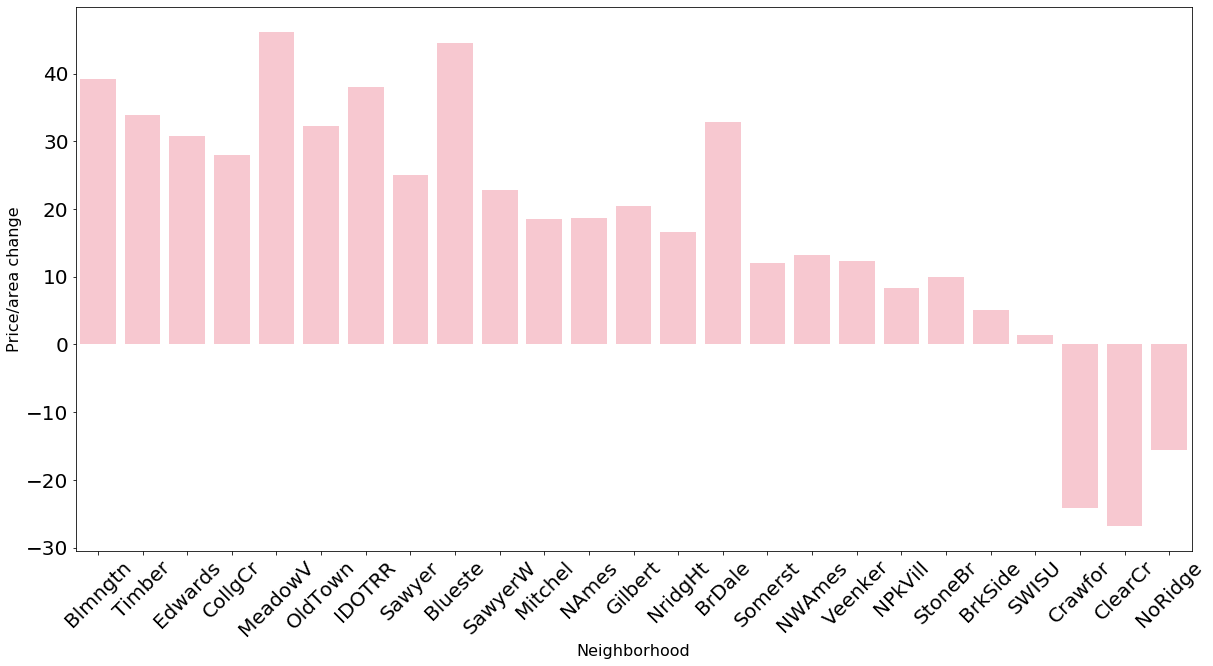

In [98]:
plt.rcParams['figure.figsize'] = [20, 10]
merged_stats = merged_cases.groupby('Neighborhood_base').mean().sort_values(by='price_change',ascending=False)
sns.barplot(data=merged_stats,x=merged_stats.index,y='price_per_area_change',color='pink')
plt.ylabel('Price/area change', fontsize=16)
plt.yticks(fontsize=20)
plt.xlabel('Neighborhood', fontsize=16)
plt.xticks(rotation=45, fontsize=20)

In [99]:
neg_price_change = merged_cases.loc[merged_cases['price_change']<0] #292 cases less than 0 price change

print("fraciton negative:", len(neg_price_change)/len(merged_cases))
neg_price_change.groupby("Neighborhood_base").count()['Id']

fraciton negative: 0.3040482342807924


Neighborhood_base
Blmngtn     3
BrDale      2
BrkSide    19
ClearCr    20
CollgCr    20
Crawfor    24
Edwards    18
Gilbert    17
IDOTRR      8
Mitchel    11
NAmes      44
NPkVill     5
NWAmes     20
NoRidge    20
NridgHt    18
OldTown    23
SWISU       7
Sawyer     14
SawyerW    12
Somerst    30
StoneBr     9
Timber      7
Veenker     2
Name: Id, dtype: int64

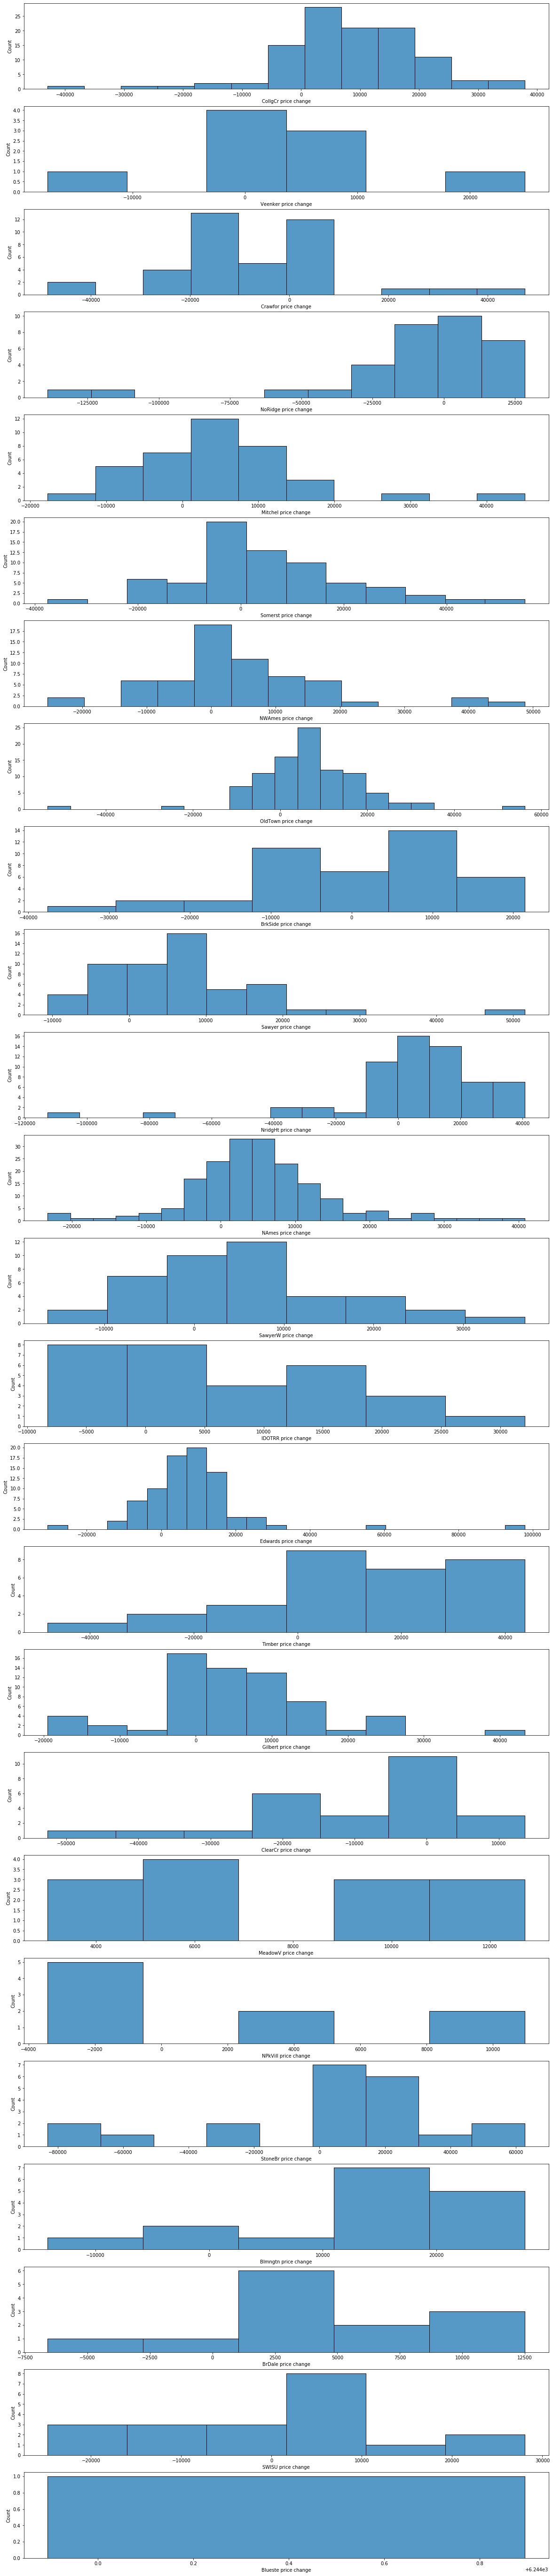

In [101]:
plt.rcParams['figure.figsize'] = [20, 100]
n_hoods = len(merged_cases['Neighborhood_base'].unique())

fig,axes = plt.subplots(n_hoods,1)
i=0
for hood in merged_cases['Neighborhood_base'].unique():
    axes[i].set_xlabel(hood+' price change')
    sns.histplot(data=merged_cases.loc[merged_cases['Neighborhood_base']==hood], x ='price_change', ax = axes[i])
    i+=1

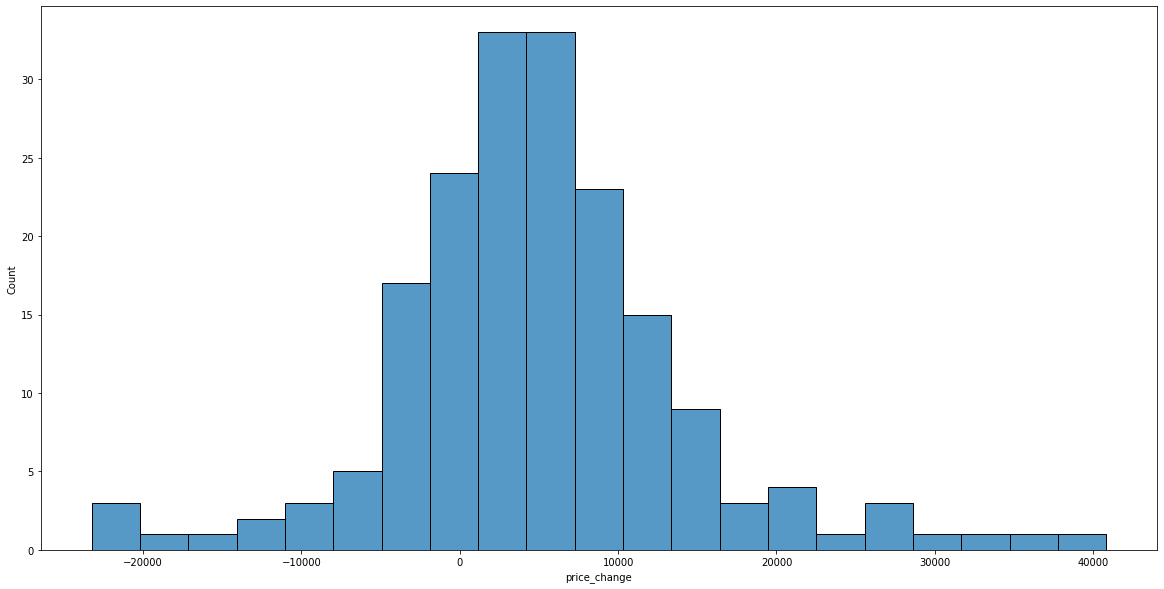

In [105]:
#look into this more:
plt.rcParams['figure.figsize'] = [20, 10]
sns.histplot(data=merged_cases.loc[merged_cases['Neighborhood_base']=='NAmes'], x ='price_change')

In [139]:
#select_subset, neighborhood_NAmes
merged_cases_NAmes=merged_cases.loc[merged_cases['Neighborhood_skew']=='NAmes'][['Id','price_change']].copy()


In [140]:
merged_cases_NAmes['price_change_binary']=1
merged_cases_NAmes.loc[merged_cases_NAmes['price_change']<0,'price_change_binary']=-1
merged_cases_NAmes

,Id,price_change,price_change_binary
14,15,1953.087419,1
15,17,10308.540341,1
18,20,4704.789265,1
24,27,2872.699087,1
26,29,-22162.785301,-1
28,34,2869.390657,1
32,38,3504.975017,1
33,39,31581.655751,1
35,41,8614.344858,1
45,55,4541.980601,1


In [141]:
merged_cases_NAmes = pd.merge(merged_cases_NAmes,X_train, on='Id')
merged_cases_NAmes

,Id,price_change,price_change_binary,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,15,1953.087419,1,20,10920,6,5,1960,1960,212.0,...,0,0,0,0,1,0,0,0,1,0
1,17,10308.540341,1,20,11241,6,7,1970,1970,180.0,...,0,0,0,0,1,0,0,0,1,0
2,20,4704.789265,1,20,7560,5,6,1958,1965,0.0,...,0,0,0,0,0,0,0,0,0,0
3,27,2872.699087,1,20,7200,5,7,1951,2000,0.0,...,0,0,0,0,1,0,0,0,1,0
4,29,-22162.785301,-1,20,16321,5,6,1957,1997,0.0,...,0,0,0,0,1,0,0,0,1,0
5,34,2869.390657,1,20,10552,5,5,1959,1959,0.0,...,0,0,0,0,1,0,0,0,1,0
6,38,3504.975017,1,20,8532,5,6,1954,1990,650.0,...,0,0,0,0,1,0,0,0,1,0
7,39,31581.655751,1,20,7922,5,7,1953,2007,0.0,...,0,0,0,0,1,0,0,0,0,0
8,41,8614.344858,1,20,8658,6,5,1965,1965,101.0,...,0,0,0,0,1,0,0,0,0,0
9,55,4541.980601,1,80,7134,5,5,1955,1955,0.0,...,0,0,0,0,1,0,0,0,1,0


In [150]:
RF_class = RandomForestClassifier(random_state=42)
predictors = merged_cases_NAmes.drop(['Id','price_change','price_change_binary'],axis=1)
target = merged_cases_NAmes['price_change_binary']
RF_class.fit(predictors, target)
print("score:",RF_class.score(predictors,target))

score: 0.967391304347826


/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


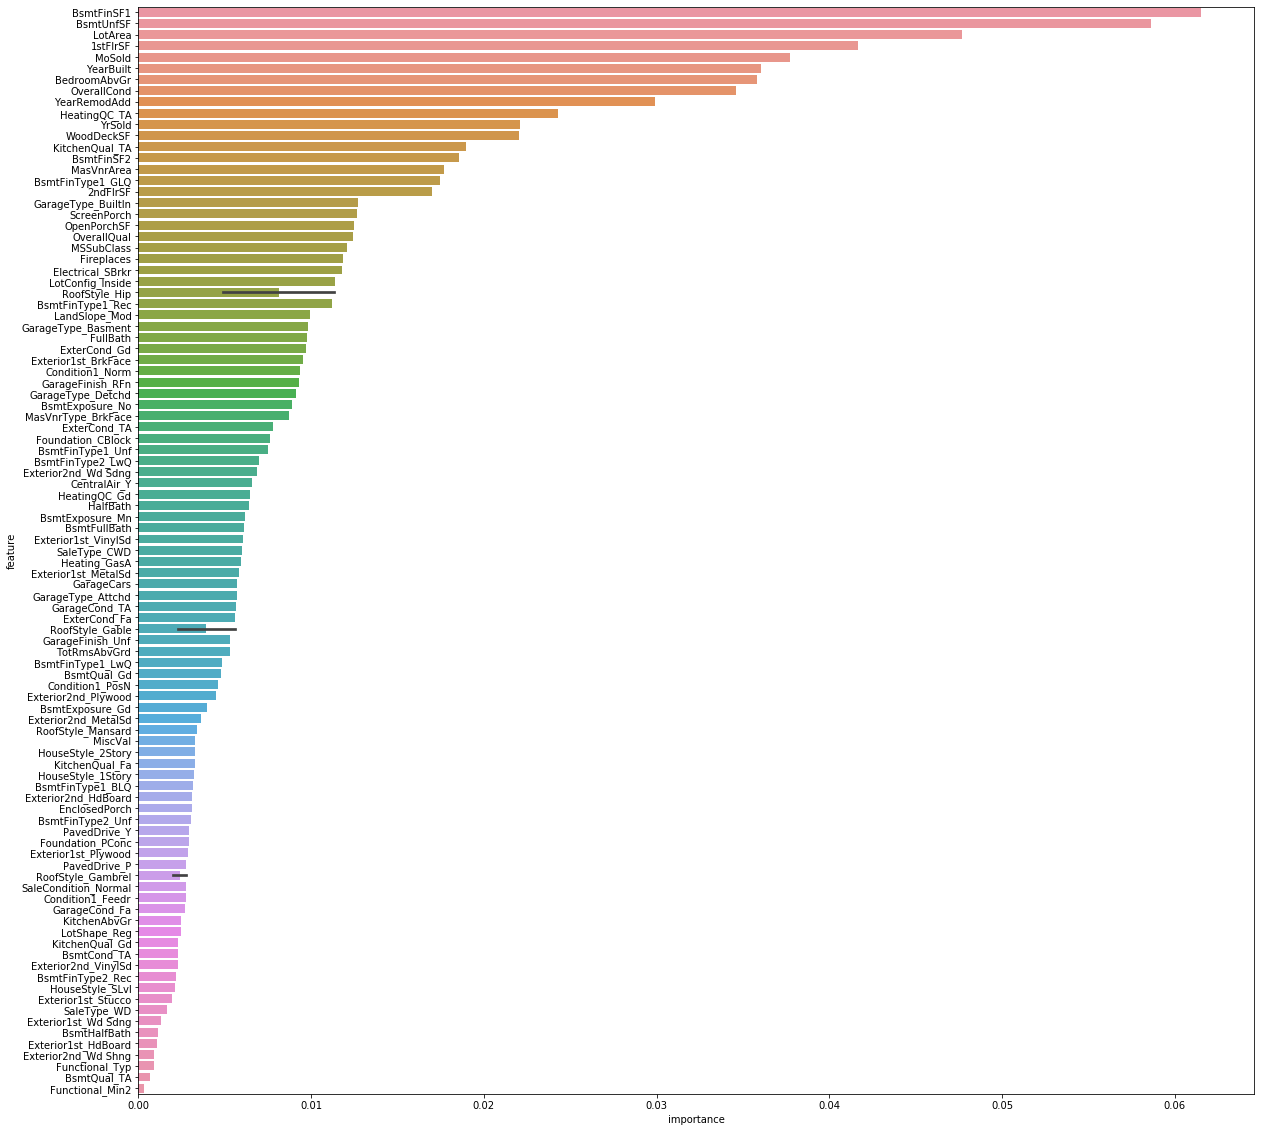

In [163]:
RF_class_params = pd.DataFrame({'feature':predictors.columns,'importance':RF_class.feature_importances_}).sort_values(by='importance',ascending=False)
plt.rcParams['figure.figsize'] = [20, 20]
filter=100
sns.barplot(x=RF_class_params['importance'][:filter],y=RF_class_params['feature'][:filter])

BsmtUnfSF: Unfinished square feet of basement area

BsmtFinSF1: Type 1 finished square feet